In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
univ=pd.read_csv("/content/UniversityDataHierarchicalclustering.csv")

In [ ]:
univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
#normalization function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
df_norm=norm_func(univ.iloc[:,1:])

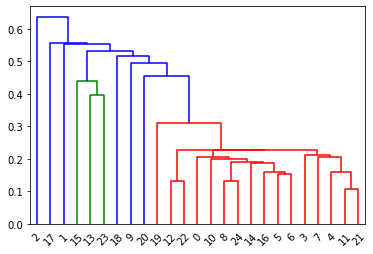

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(df_norm, method='single'))

In [ ]:
#create clusters
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [ ]:
#save cluster for chart
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [ ]:
Clusters

,Clusters
0,0
1,3
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
univ['h_clusteid']=Clusters

In [ ]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusteid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetow,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopk,1305,75,44,7,58691,87,0


K means clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Univ=pd.read_csv("/content/UniversityDataHierarchicalclustering.csv")

In [ ]:
#normalization function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_Univ_df=scaler.fit_transform(Univ.iloc[:,1:])

In [ ]:
#how to find optimum number of cluster
#the kmeans algorithm aims to choose centroids that minimise the interia, or wihtin clustering sum

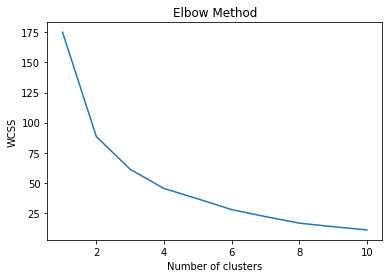

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#build cluster algorithm
from sklearn.cluster import KMeans
clusters_new=KMeans(4,random_state=42)#partition should remain same for multiple runs, hence 42 which has no significance any value can be entered
clusters_new.fit(scaled_Univ_df)


KMeans(n_clusters=4, random_state=42)

In [ ]:
clusters_new.labels_

array([0, 2, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 0, 1, 3, 3, 3, 3,
       3, 1, 0], dtype=int32)

In [ ]:
#assign clusters to the data set
Univ['clusterid_new']=clusters_new.labels_

In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetow,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopk,1305,75,44,7,58691,87,0


In [ ]:
#these are standardized values
clusters_new.cluster_centers_ #not required, does not give much info

array([[ 0.7587798 ,  0.60500197, -0.78639393, -0.53197195,  0.61804481,
         0.71889161, -0.33859959],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366,  0.36681622],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351,  3.89389527],
       [-0.12658888,  0.06407139,  0.2224667 ,  0.04516743, -0.38064332,
         0.02028221, -0.19751643]])

In [ ]:
Univ.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1347.0,88.00,24.0,10.60,36123.1,93.10
1,1,1061.5,38.75,70.0,19.25,9953.0,71.75
2,2,1415.0,100.00,25.0,6.00,63575.0,81.00
3,3,1253.0,77.70,43.5,12.90,22008.2,86.90


In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetow,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopk,1305,75,44,7,58691,87,0
